In [9]:
%pip install pandas
%pip install matplotlib
%pip install nltk


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [10]:
import pandas as pd 

data = pd.read_csv('emily-flattened.csv')
# Keeping only the necessary columns
poems = data['poem']
seasons = data['season']

print(seasons)



0        none
1        none
2      summer
3      spring
4      second
        ...  
588      none
589      none
590      late
591    autumn
592    summer
Name: season, Length: 593, dtype: object


In [11]:
from matplotlib import pyplot as plt

%matplotlib inline

def plotWordFrequency(input):
    data = sorted([(w, input.count(w)) for w in set(input)], key = lambda x:x[1], reverse=True)[:40] 
    most_words = [x[0] for x in data]
    times_used = [int(x[1]) for x in data]
    plt.figure(figsize=(20,10))
    plt.bar(x=most_words, height=times_used, color = 'pink', edgecolor = 'red',  width=.5)
    plt.xticks(rotation=45, fontsize=18)
    plt.yticks(rotation=0, fontsize=18)
    plt.xlabel('Most Common Words:', fontsize=18)
    plt.ylabel('Number of Occurences:', fontsize=18)
    plt.title('Most Commonly Used Words', fontsize=24)
    plt.show()



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jenniferlooper/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


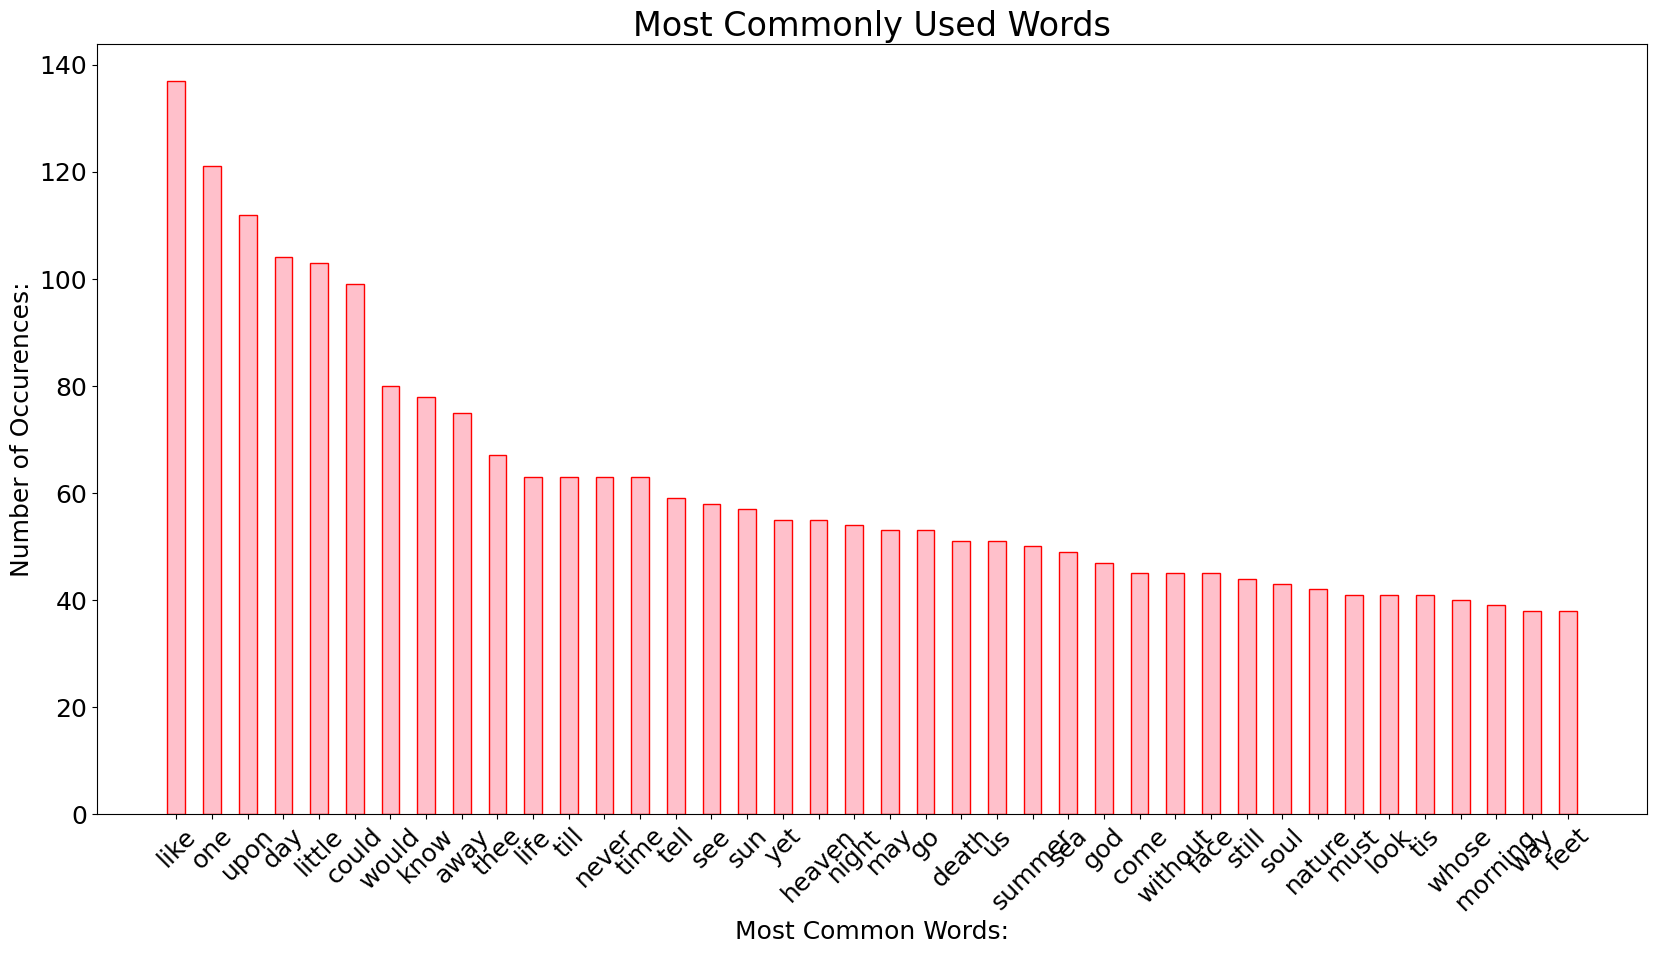

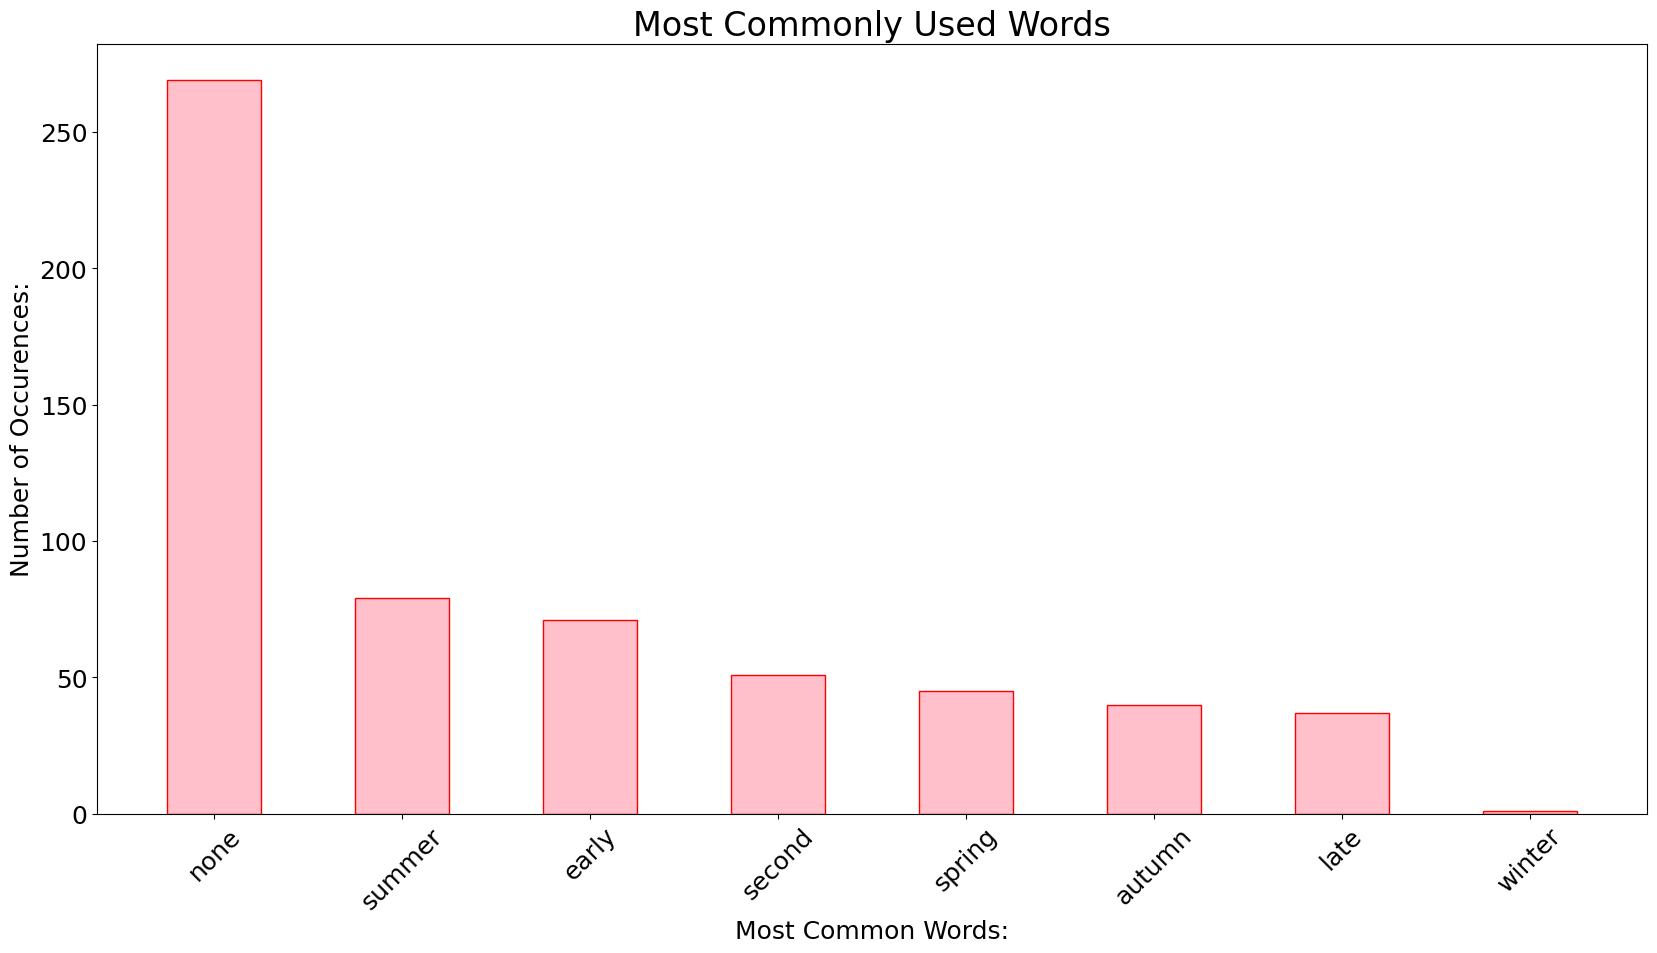

In [12]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords') 

from nltk.tokenize import RegexpTokenizer

stopWords = set(stopwords.words('english'))

poemWordsFiltered = []
seasonsWordsFiltered = []
tokenizer = RegexpTokenizer(r'\w+')
    
def process_text(data):
    """
    Process text data by tokenizing, converting to lowercase, and removing stopwords
    Args:
        data: List of text strings to process
    Returns:
        filtered_words: List of processed words with stopwords removed
   """
    filtered_words = []
    cleaned_words = tokenizer.tokenize(' '.join(data).lower())
    for word in cleaned_words:
        if word not in stopWords and word:
            filtered_words.append(word)
            
    return filtered_words

poemWordsFiltered = process_text(poems)
seasonsWordsFiltered = process_text(seasons)

plotWordFrequency(poemWordsFiltered)
plotWordFrequency(seasonsWordsFiltered)


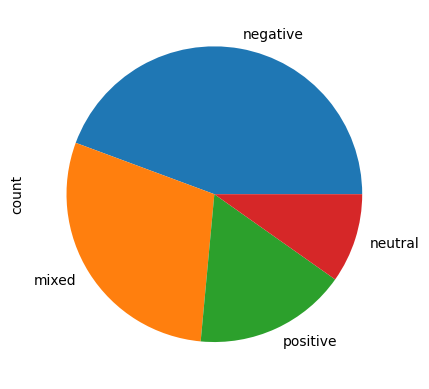

In [13]:
import matplotlib.pyplot as plt
data['sentiment'].value_counts().head(10).plot.pie()
plt.gca().set_aspect('equal')

In [14]:
data.sentiment.value_counts()

sentiment
negative    263
mixed       173
positive     99
neutral      58
Name: count, dtype: int64

In [15]:
data.season.value_counts()


season
none      269
summer     79
early      70
second     51
spring     45
autumn     40
late       37
early       1
winter      1
Name: count, dtype: int64

          spring  summer  autumn  winter  early  second  late  none
negative      18      32      18       1     33      16    16   129
positive       3       9       9       0     11       6     7    54
mixed         20      29      12       0     19      27    10    55
neutral        4       9       1       0      7       2     4    31


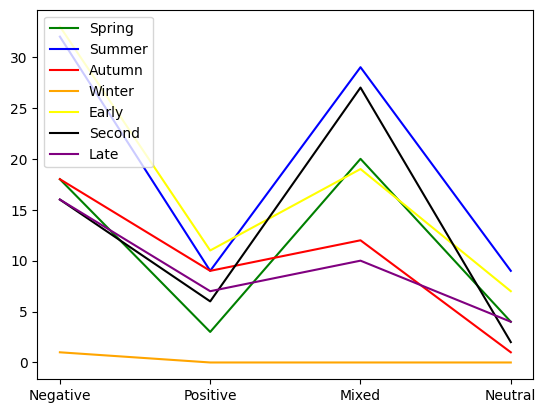

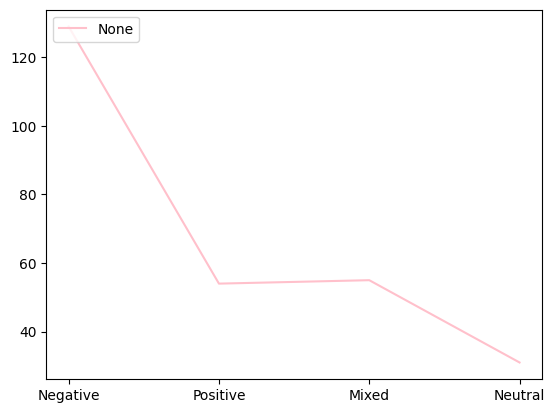

In [16]:
def get_season_sentiments(data, season):
    """Calculate sentiment counts for a given season"""
    sentiments = ['negative', 'positive', 'mixed', 'neutral']
    counts = []
    for sentiment in sentiments:
        count = data[(data['season'] == season) & (data['sentiment'] == sentiment)].id.count()
        counts.append(count)
    return counts

# Calculate sentiments for all seasons
seasons = ['spring', 'summer', 'autumn', 'winter', 'early', 'second', 'late', 'none']
dfinal = {}

for season in seasons:
    counts = get_season_sentiments(data, season)
    dfinal[season] = pd.Series(counts, index=['negative', 'positive', 'mixed', 'neutral'])

df = pd.DataFrame(dfinal)
print(df)

# Plotting
numpoems = ['Negative', 'Positive', 'Mixed', 'Neutral']
colors = {'spring': 'green', 'summer': 'blue', 'autumn': 'red', 'winter': 'orange',
          'early': 'yellow', 'second': 'black', 'late': 'purple', 'none': 'pink'}

# Plot all seasons except 'none'
for season in [s for s in seasons if s != 'none']:
    plt.plot(numpoems, get_season_sentiments(data, season), 
               color=colors[season], label=season.capitalize())
plt.legend(loc='upper left', frameon=True)
plt.show()

# Plot 'none' separately
plt.plot(numpoems, get_season_sentiments(data, 'none'), 
           color=colors['none'], label='None')
plt.legend(loc='upper left', frameon=True)
plt.show()